# **Pedro Loja A.**
# **José Sanango R**

#### Link of video

<a href="https://www.youtube.com/watch?v=ltJmVMS8iPU">Miranos en Youtube</a>


To carry out our simulation, we have carried out a field investigation which consisted in carrying out a survey to the GMLAB laboratory manager, who was very quick to help us in any data that we required, besides we could verify the facilities and know which process is attention to a patient who arrives at the aforementioned facility.

Below we attach the image of the account made to the laboratory manager.

<img src="encuesta.jpg"/>

* **Implementation of the simulation**

LABORATORIOS GMLAB
Llega el paciente: Paciente-1 a la hora 0.00.
Llega el paciente: Paciente-2 a la hora 0.00.
Llega el paciente: Paciente-3 a la hora 0.00.
Llega el paciente: Paciente-4 a la hora 0.00.
Llega el paciente: Paciente-5 a la hora 0.00.
Llega el paciente: Paciente-6 a la hora 0.00.
Llega el paciente: Paciente-7 a la hora 0.00.
Llega el paciente: Paciente-8 a la hora 0.00.
Llega el paciente: Paciente-9 a la hora 0.00.
Llega el paciente: Paciente-10 a la hora 0.00.
Llega el paciente: Paciente-11 a la hora 0.00.
Llega el paciente: Paciente-12 a la hora 0.00.
Llega el paciente: Paciente-13 a la hora 0.00.
Llega el paciente: Paciente-14 a la hora 0.00.
Llega el paciente: Paciente-15 a la hora 0.00.
Llega el paciente: Paciente-16 a la hora 0.00.
Llega el paciente: Paciente-17 a la hora 0.00.
Llega el paciente: Paciente-18 a la hora 0.00.
Llega el paciente: Paciente-19 a la hora 0.00.
Llega el paciente: Paciente-20 a la hora 0.00.
Llega el paciente: Paciente-21 a la hora 0.00.
Lle

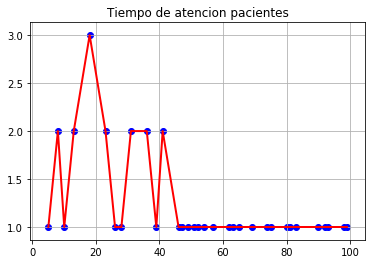

---------------------->Resultados de la simulación<-----------------------

Tiempo promedio de atencion de pacientes
El promedio total de atencion es de:
53.0


In [65]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

# Maximo de pacientes que puede recibir el negocio
MAX_PACIENTES = 450
# Total de ventanillas de atencion con que cuenta el negocio
NUM_VENTANILLAS = 3
# Total de ventanillas para toma de muestras
NUM_VEN_MUESTRAS= 2
# Tiempo de atencion de un paciente particular (minutos)
TIEMPO_ATENCION_PARTICULAR = random.randint(3,5)
# Tiempo de atencion de un paciente convenio (minutos)
TIEMPO_ATENCION_CONVENIO = random.randint(5,10)
# Tiempo de atencion para muestras paciente particular (minutos)
TIEMPO_MUESTRAS = random.randint(5,15)
# Numero de asientos disponibles en la sala de espera
NUM_ASIENTOS=23
# Intervalo de tiempo en que llegan los pacientes (minutos)
INTERVALO_LLEGADA = 7
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar el tiempo que tarda en ser atendido un paciente
tiempo={}
mues={}

class Laboratorio(object):
    def __init__(self, environment, num_ventanillas,num_ven_muestras,tiempo_atencion_particular,
                 tiempo_atencion_convenio,num_asientos,tiempo_muestras):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa el numero de ventanillas
        self.ventanillas = simpy.Resource(environment, num_ventanillas)
        # Creamos el recurso que representa el numero de ventanillas para muestras
        self.ventanillas_muestras = simpy.Resource(environment, num_ven_muestras)
        # Creamos el recurso que representa el numero de asientos disponibles en la sala de espera
        self.asientos = simpy.Resource(environment, num_asientos)
        # Variable para el tiempo de espera
        self.tiempo_particular = tiempo_atencion_particular
        self.tiempo_convenio = tiempo_atencion_convenio
        self.tiempo_muestras = tiempo_muestras
        
    def atender_paciente(self, paciente,tipo):
        if(tipo == 'Privado'):
            yield self.env.timeout(TIEMPO_ATENCION_PARTICULAR)
        if(tipo == 'Convenio'):
            yield self.env.timeout(TIEMPO_ATENCION_CONVENIO)
        print('Sale el paciente: %s de tipo: %s de la ventanilla a la hora %.2f.' % (paciente,tipo,env.now))
    
    def tomar_muestras(self,paciente):
        yield self.env.timeout(TIEMPO_MUESTRAS)
        print('Sale el paciente: %s del laboratorio a la hora %.2f.' % (paciente,env.now))
        
def llegada_paciente(env, paciente,laboratorio):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el paciente con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (paciente, env.now))
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # un asiento
    with laboratorio.asientos.request() as asientos:
        # Ocupamos el asiento de espera
        yield asientos
        #Indicamos que el paciente se esta trasladando a una ventanilla
        print('Se traslada paciente: %s a la hora %.2f.' % (paciente,env.now))
        yield env.process(asignar_ventanillas(paciente,laboratorio))
        
def asignar_ventanillas(paciente, laboratorio):
    print('Llega paciente: %s a la ventanilla a la hora %.2f.' % (paciente, env.now))
    with laboratorio.ventanillas.request() as ventanillas:
        yield ventanillas
        #Procesamos la atencion al paciente
        clase=['Privado','Convenio']
        tipo=random.choice(clase)
        yield env.process(laboratorio.atender_paciente(paciente,tipo))
        print('Se traslada paciente: %s a la ventanilla de toma de muestras a la hora %.2f.' % (paciente,env.now))
        t=env.now
    if t in tiempo:
        tiempo[t]=tiempo[t]+1
    else:
        tiempo[t]=1
        yield env.process(muestrasp(paciente,laboratorio))

def muestrasp(paciente,laboratorio):
    print('Llega paciente: %s a la ventanilla de muestras a la hora %.2f.' % (paciente, env.now))
    with laboratorio.ventanillas_muestras.request() as muestras:
        yield muestras
        print('Ingresa el paciente: %s a la hora %.2f. para toma de muestras' % (paciente, env.now))
        yield env.process(laboratorio.tomar_muestras(paciente))
        
        print('El paciente: %s a la hora %.2f. fue atendido en los laboratorios GMLAB.' % (paciente,env.now))

def ejecutar_simulacion(env, num_ventanillas,num_ven_muestras,tiempo_atencion_particular,
                        tiempo_atencion_convenio,num_asientos,tiempo_muestras,intervalo):
    
    laboratorio=Laboratorio(env,num_ventanillas,num_ven_muestras,tiempo_atencion_particular,
                            tiempo_atencion_convenio,num_asientos,tiempo_muestras)
    for i in range(250):
        env.process(llegada_paciente(env, 'Paciente-%d'%(i+1),laboratorio))
        
     # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se atiendes los pacientes generamos mas pacientes
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),laboratorio))

print('LABORATORIOS GMLAB')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_VENTANILLAS,NUM_VEN_MUESTRAS,TIEMPO_ATENCION_PARTICULAR,
                                TIEMPO_ATENCION_CONVENIO,TIEMPO_MUESTRAS,NUM_ASIENTOS,INTERVALO_LLEGADA))


env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.title("Tiempo de atencion pacientes")
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

print('---------------------->Resultados de la simulación<-----------------------\n')
print('Tiempo promedio de atencion de pacientes')
sumaP=np.sum(x)
totalP=len(x)
prom=sumaP/totalP
print('El promedio total de atencion es de:')
print(round(prom))